<a href="https://colab.research.google.com/github/Dtenisha/CNN-Model-CIFAR-10-DATASET/blob/main/CNN_Model_for_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train[5:]

array([1, 2, 7, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[7]

'horse'

In [ ]:
def plot_sample(x,y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


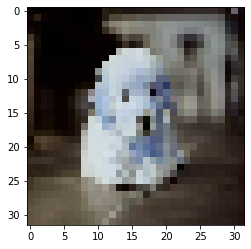

<Figure size 1080x144 with 0 Axes>

In [ ]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('dog_img.jfif')
im_resized = cv2.resize(im, (32, 32,))

plt.imshow(im_resized)
plt.figure(figsize = (15,2))
plt.show()

In [ ]:
imr = im_resized/255

In [ ]:
pixels = np.expand_dims(imr, axis=0)

In [ ]:
pixels

array([[[[0.02745098, 0.00392157, 0.02352941],
         [0.02352941, 0.00392157, 0.00392157],
         [0.01960784, 0.        , 0.00392157],
         ...,
         [0.07843137, 0.02745098, 0.03137255],
         [0.40784314, 0.38823529, 0.41176471],
         [0.0745098 , 0.03529412, 0.04705882]],

        [[0.07843137, 0.02352941, 0.00784314],
         [0.16078431, 0.11372549, 0.0745098 ],
         [0.05490196, 0.01176471, 0.01960784],
         ...,
         [0.09803922, 0.0745098 , 0.08627451],
         [0.09019608, 0.04705882, 0.05098039],
         [0.05882353, 0.00784314, 0.        ]],

        [[0.03529412, 0.00392157, 0.00784314],
         [0.03137255, 0.00784314, 0.        ],
         [0.00784314, 0.00392157, 0.00392157],
         ...,
         [0.14117647, 0.14509804, 0.16078431],
         [0.09803922, 0.07843137, 0.12156863],
         [0.04705882, 0.01960784, 0.03529412]],

        ...,

        [[0.37254902, 0.3254902 , 0.25490196],
         [0.39607843, 0.34509804, 0.27843137]

In [ ]:
pixels.shape

(1, 32, 32, 3)

In [ ]:
pixels

array([[[[0.02745098, 0.00392157, 0.02352941],
         [0.02352941, 0.00392157, 0.00392157],
         [0.01960784, 0.        , 0.00392157],
         ...,
         [0.07843137, 0.02745098, 0.03137255],
         [0.40784314, 0.38823529, 0.41176471],
         [0.0745098 , 0.03529412, 0.04705882]],

        [[0.07843137, 0.02352941, 0.00784314],
         [0.16078431, 0.11372549, 0.0745098 ],
         [0.05490196, 0.01176471, 0.01960784],
         ...,
         [0.09803922, 0.0745098 , 0.08627451],
         [0.09019608, 0.04705882, 0.05098039],
         [0.05882353, 0.00784314, 0.        ]],

        [[0.03529412, 0.00392157, 0.00784314],
         [0.03137255, 0.00784314, 0.        ],
         [0.00784314, 0.00392157, 0.00392157],
         ...,
         [0.14117647, 0.14509804, 0.16078431],
         [0.09803922, 0.07843137, 0.12156863],
         [0.04705882, 0.01960784, 0.03529412]],

        ...,

        [[0.37254902, 0.3254902 , 0.25490196],
         [0.39607843, 0.34509804, 0.27843137]

In [ ]:
from IPython.display import display, Image
display(Image(filename='truck_img.jpg'))


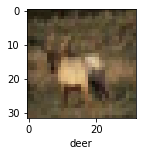

In [ ]:
plot_sample(x_train, y_train, 3)

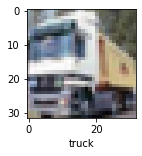

In [ ]:
plot_sample(x_train, y_train, 1)

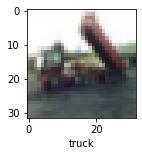

In [ ]:
plot_sample(x_train, y_train, 2)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
#normalize data - divide each data 255
x_train = x_train/255
x_test = x_test/255

In [ ]:
#build a simple artificial neural network
ann = models.Sequential([
                         layers.Flatten(input_shape = (32,32,3)),
                         layers.Dense(3000, activation = 'relu'), #3000 deep layers
                         layers.Dense(1000,activation = 'relu'), #1000 deep layers
                         layers.Dense(10, activation = 'sigmoid') #10 layers
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.8145 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.6244 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5418 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4824 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4309 - accuracy: 0.4966


In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.4857 - accuracy: 0.4663


[1.4856970310211182, 0.46630001068115234]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test, y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      1000
           1       0.69      0.49      0.58      1000
           2       0.54      0.11      0.19      1000
           3       0.35      0.34      0.35      1000
           4       0.51      0.22      0.31      1000
           5       0.45      0.31      0.37      1000
           6       0.32      0.84      0.47      1000
           7       0.45      0.64      0.53      1000
           8       0.57      0.66      0.61      1000
           9       0.58      0.54      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [ ]:
#cnn
cnn = models.Sequential([
                         layers.Conv2D(filters = 32, kernel_size= (3,3),activation = 'relu', input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         
                         layers.Conv2D(filters = 32, kernel_size= (3,3),activation = 'relu', input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         
                         layers.Flatten(),
                         layers.Dense(64,activation = 'relu'), #1000 deep layers
                         layers.Dense(10, activation = 'softmax') #10 layers
])


In [ ]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4889 - accuracy: 0.4650
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1625 - accuracy: 0.5903
Epoch 3/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0518 - accuracy: 0.6308
Epoch 4/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9738 - accuracy: 0.6599
Epoch 5/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9191 - accuracy: 0.6778
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8638 - accuracy: 0.6983
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8211 - accuracy: 0.7133
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7860 - accuracy: 0.7229
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7494 - accuracy: 0.7363
Epoch 10/10
1563/1563 [==============================] - 49s 32m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9237 - accuracy: 0.6887


[0.9236647486686707, 0.6887000203132629]

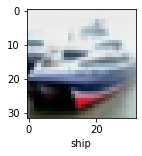

In [ ]:
y_test = y_test.reshape(-1)
plot_sample(x_test,y_test, 1)

In [ ]:
y_pred

array([[1.9077384e-03, 9.5553574e-04, 2.1267952e-03, ..., 3.2660828e-04,
        1.0960869e-02, 1.1691536e-03],
       [7.1450751e-03, 7.3343880e-02, 4.2355819e-07, ..., 2.9178421e-10,
        9.1737586e-01, 2.1344938e-03],
       [5.2592762e-02, 1.5289702e-01, 3.9127402e-04, ..., 3.4528198e-03,
        7.6433986e-01, 2.2079511e-02],
       ...,
       [6.2173209e-04, 9.3473818e-06, 1.1162105e-02, ..., 4.4758886e-02,
        2.6461084e-05, 3.3485117e-05],
       [7.8927115e-02, 6.8843816e-03, 1.2830979e-02, ..., 1.3458291e-02,
        1.0154627e-04, 1.3279259e-03],
       [1.1969712e-06, 2.0258180e-06, 2.0480643e-04, ..., 9.9122882e-01,
        3.8863854e-07, 2.6599739e-06]], dtype=float32)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.9077384e-03, 9.5553574e-04, 2.1267952e-03, 8.4749043e-01,
        3.1971693e-04, 1.1968428e-01, 1.5058874e-02, 3.2660828e-04,
        1.0960869e-02, 1.1691536e-03],
       [7.1450751e-03, 7.3343880e-02, 4.2355819e-07, 1.7376279e-07,
        3.5024275e-09, 1.1274705e-08, 8.8102086e-09, 2.9178421e-10,
        9.1737586e-01, 2.1344938e-03],
       [5.2592762e-02, 1.5289702e-01, 3.9127402e-04, 3.5519502e-03,
        3.9199094e-04, 2.4258466e-04, 6.0229446e-05, 3.4528198e-03,
        7.6433986e-01, 2.2079511e-02],
       [9.5570052e-01, 1.5689734e-02, 1.7453125e-04, 6.4454193e-04,
        2.0076970e-03, 3.4951852e-05, 4.0012805e-05, 4.8947215e-05,
        1.9778864e-02, 5.8801416e-03],
       [5.2245173e-07, 2.4615842e-06, 5.3628446e-03, 8.8278838e-03,
        4.6980277e-01, 3.8758488e-03, 5.1211268e-01, 1.2369782e-05,
        1.2514644e-06, 1.3917943e-06]], dtype=float32)

In [ ]:
np.argmax([5,12,1,2])

1

In [ ]:
np.argmax([5,12,167,2])

2

In [ ]:
y_classes

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

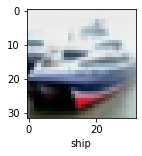

In [ ]:
plot_sample(x_test,y_test, 1)

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
classes[y_classes[4]]

'frog'

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
a = cnn.predict(pixels)

In [ ]:
a

array([[4.6628034e-03, 2.9371944e-03, 2.3517638e-02, 3.4792495e-01,
        2.1006001e-05, 3.8535273e-01, 8.4010142e-05, 1.2447965e-02,
        2.6325598e-02, 1.9672607e-01]], dtype=float32)

In [ ]:
v_classes = np.argmax(a)

In [ ]:
v_classes

5

In [ ]:
h_classes = [np.argmax(element) for element in a]
h_classes

[1]